Import

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn import tree
from sklearn import metrics
from sklearn.metrics import classification_report
from matplotlib import pyplot as plt
import seaborn as sns

Load Data

In [55]:
from datetime import datetime




In [2]:

from sklearn.preprocessing import StandardScaler
data = pd.read_csv('./Data/datavf.csv')

x=data.iloc[:, :-2]
# x=data.loc[:,['statuses' , 'date_joined' , 'most_recent_post' , 'following' , 'followers' , 'likes', 'retweet' , 'retweeted_count'  ,'avg_tweets_by_hour_of_day', 'avg_tweets_by_day_of_week']]

y = data.account_type.values.tolist()

In [3]:




x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=48)


Train the decision tree model

In [4]:
clt = DecisionTreeClassifier()
clt.fit(x_train,y_train)

y_pred_train = clt.predict(x_train)
y_pred_test = clt.predict(x_test)


Calculate the accuracy of the model

In [5]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,  y_pred_test)


0.8156818181818182

Calculate the classification report of the model


Training Accuracy score: 1.0
Testing Accuracy score: 0.8156818181818182
DecisionTreeClassifier score: 1.0
classification_report 
               precision    recall  f1-score   support

           0       0.81      0.82      0.81      2158
           1       0.83      0.81      0.82      2242

    accuracy                           0.82      4400
   macro avg       0.82      0.82      0.82      4400
weighted avg       0.82      0.82      0.82      4400



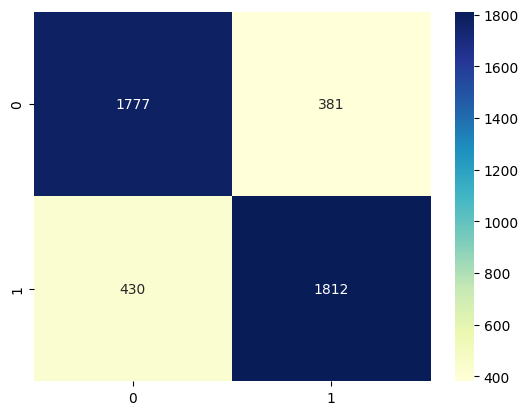

In [6]:
print("\nTraining Accuracy score:",accuracy_score(y_train, y_pred_train))
print("Testing Accuracy score:",accuracy_score(y_test, y_pred_test))
print("DecisionTreeClassifier score:",clt.score(x_train, y_train))
print("classification_report \n "+classification_report(y_test, y_pred_test))

from sklearn.metrics import confusion_matrix
cm = metrics.confusion_matrix(y_test,  y_pred_test)

cm_matrixNB = pd.DataFrame(data=cm)
sns.heatmap(cm_matrixNB, annot=True, fmt='d', cmap='YlGnBu')
plt.show()